In [33]:
import numpy as np 
from matplotlib import pyplot as plt 
from scipy.integrate import solve_ivp
import sys
import math
plt.style.use('bmh')

In [34]:
class Star():
    def __init__(self,n):
        self.n = n
        self.initialConditions = np.array([1,0]) #theta = 1, and the derivative zero
        self.epsilon,self.end,self.numPoints = 10**(-2), 10, 2000
        self.iterations = 0
        self.tolerance = 10**(-4)
        
    def solve(self):
        if self.iterations == 10: #Make infinite-loop protected code
            sys.exit()
        randomSpan = np.linspace(-2,1,self.numPoints)
        tSpan = 10**randomSpan
        sol = solve_ivp(self.funcLE,np.array([self.epsilon,self.end]),self.initialConditions,t_eval=tSpan,method='DOP853')
        if sol.y[0][-1] > self.tolerance:
            print(f"Current last element {sol.y[0][-1]} and numPoints = {self.numPoints}")
            self.end +=1
            self.numPoints +=500
            self.iterations +=1
            self.solve()
        else:
            self.timeSpan,self.thetaDeriv, self.theta = sol.t, sol.y[1],sol.y[0]
            self.findCharacteristics()
        pass

    def funcLE(self,t,y):
        return np.array([y[1],-(y[0])**self.n-(2/t)*y[1]]) #As it is a second order differential equation
        #we need to solve this system of equations finding and the derivative of y in the process
    
    def findCharacteristics(self): #This function must be called after solving the LE and is used to find
    #ksi1 and its derivative
        index = 0
        if self.n == 1.5:
            index = -1 #as it is the last element of the y array
        else:
            index = np.argmin(np.abs(self.theta)) #in order to do it in general, as the above way is a cheat
            #for the non-relativistic case, because it does not pass zero 
        self.ksi,self.ksiDeriv = self.timeSpan[index],self.thetaDeriv[index]
        pass
    
    def radiusRelationship(self,densityRatio):
        if self.n == 3:
            return 3592*self.ksi*(densityRatio)**(1/3)
        else:
            return 809*self.ksi*(densityRatio)**(1/6)
    def polytropic(self):
        return self.theta**self.n
    
    def mass(self): #This function will use the integral expression for the mass to return it as an array
        #Of course it will be in terms of 4*pi*a**3*rho_0
        #We will need to do a numerical integration using the trapezoid method
        #Our function is x**2*theta**n, 
        #We pick values up to ksi
        massArray = []
        for element in self.timeSpan:
            mask = self.timeSpan <= element
            xValues = self.timeSpan[mask]
            thetaValues = self.theta[mask]
        #Do the trapezoid integration
            massArray.append(np.trapz(xValues**(2) * thetaValues**(self.n),xValues))
        return self.timeSpan, massArray

In [35]:
starsArray = [Star(n) for n in [3,1.5]] #Relativistic and non-relativistic
for star in starsArray:
    star.solve()

Current last element 0.0016718636171885373 and numPoints = 2000
Current last element 0.001596687905682229 and numPoints = 2500
Current last element 0.0015465833301887492 and numPoints = 3000


C:\Users\grega\AppData\Local\Temp\ipykernel_9768\794232193.py:27: RuntimeWarning: invalid value encountered in scalar power
  return np.array([y[1],-(y[0])**self.n-(2/t)*y[1]]) #As it is a second order differential equation


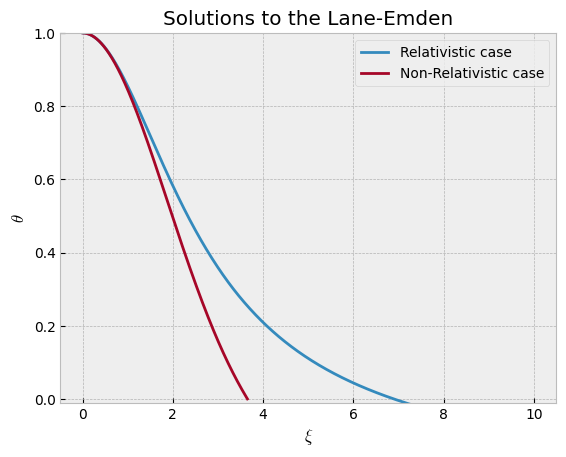

In [36]:
plt.plot(starsArray[0].timeSpan,starsArray[0].theta,label='Relativistic case')
plt.plot(starsArray[1].timeSpan,starsArray[1].theta,label='Non-Relativistic case')
plt.title('Solutions to the Lane-Emden')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta$')
plt.ylim(-0.01,1)
plt.legend()
plt.show()

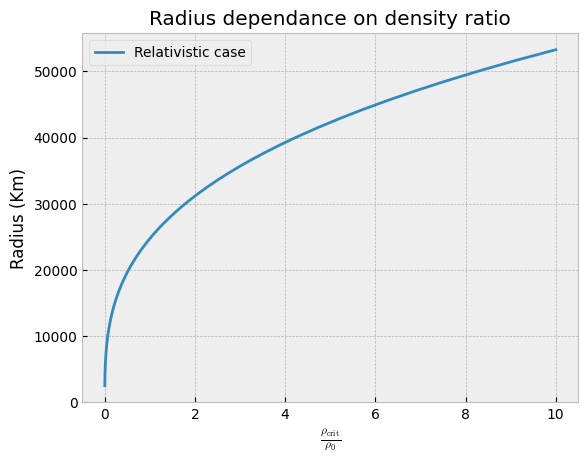

In [37]:
densityRelativistic = 10**np.linspace(-3,1,100)
plt.plot(densityRelativistic,starsArray[0].radiusRelationship(densityRelativistic),label='Relativistic case')
plt.ylabel(r'Radius (Km)')
plt.xlabel(r"$\frac{\rho_{\text{crit}}}{\rho_0}$")
plt.title('Radius dependance on density ratio')
plt.legend()
plt.show()

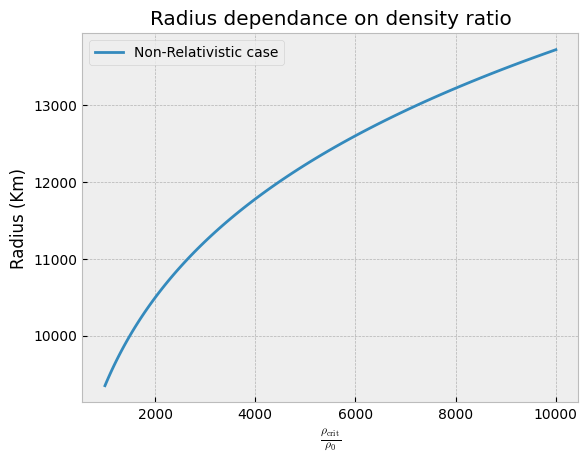

In [38]:
densityNonRelativistic = 10**np.linspace(3,4,100)
plt.plot(densityNonRelativistic,starsArray[1].radiusRelationship(densityNonRelativistic),label='Non-Relativistic case')
plt.ylabel(r'Radius (Km)')
plt.xlabel(r"$\frac{\rho_{\text{crit}}}{\rho_0}$")
plt.title('Radius dependance on density ratio')
plt.legend()

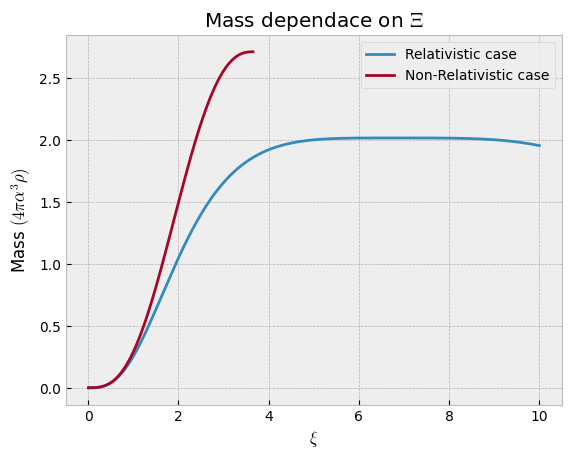

In [39]:
plt.plot(*starsArray[0].mass(),label='Relativistic case')
plt.plot(*starsArray[1].mass(),label='Non-Relativistic case')
plt.title(r'Mass dependace on $\Xi$')
plt.xlabel(r'$\xi$')
plt.ylabel(r'Mass $(4 \pi \alpha^3 \rho)$')
plt.legend()
plt.show()